In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [3]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_train_full.dtype)
print(type(X_train_full))

(60000, 28, 28)
(60000,)
uint8
<class 'numpy.ndarray'>


In [4]:
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [5]:
class_names=["T-Shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [6]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])


In [17]:
history=model.fit(X_train,y_train,epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2202 - accuracy: 0.9226 - val_loss: 0.2991 - val_accuracy: 0.8936
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2160 - accuracy: 0.9205 - val_loss: 0.3032 - val_accuracy: 0.8904
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2138 - accuracy: 0.9241 - val_loss: 0.3152 - val_accuracy: 0.8864
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2083 - accuracy: 0.9256 - val_loss: 0.3068 - val_accuracy: 0.8884
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2085 - accuracy: 0.9251 - val_loss: 0.3011 - val_accuracy: 0.8904
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2049 - accuracy: 0.9259 - val_loss: 0.2875 - val_accuracy: 0.8964
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2016 - accuracy: 0.9276 - val_loss: 0.3074 - val_accuracy:

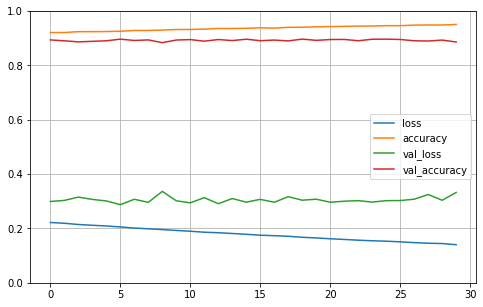

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [22]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 75.5403 - accuracy: 0.8500


[75.54031372070312, 0.8500000238418579]

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
housing=fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target)
X_train,X_dev,y_train,y_dev=train_test_split(X_train_full,y_train_full)
scaller=StandardScaler()
X_train=scaller.fit_transform(X_train)
X_test=scaller.fit_transform(X_test)
X_dev=scaller.fit_transform(X_dev)

In [4]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error",optimizer="sgd")
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_dev,y_dev))
mse_test=model.evaluate(X_test,y_test)
X_new=X_test[:3]
y_pred=model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 4s 7ms/step - loss: 1.2866 - val_loss: 2.3986
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 8.7250 - val_loss: 1127.8575
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5159 - val_loss: 1057.9952
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4797 - val_loss: 1047.3181
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4250 - val_loss: 1049.4452
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4255 - val_loss: 1052.6436
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4134 - val_loss: 1058.7861
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4016 - val_loss: 1060.7402
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3950 - val_loss: 1064.7384
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0

In [5]:
print(X_train[0])

[ 0.43932233 -0.9287792  -0.89376089 -0.12418488 -0.65021271 -0.10810395
  0.89981598 -1.34405966]


In [7]:
#complex models using functional API
input_A=keras.layers.Input(shape=[5],name="wide_input")
input_B=keras.layers.Input(shape=[6],name="deep_input")
hidden1=keras.layers.Dense(30,activation="relu")(input_B)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.concatenate([input_A,hidden2])
output=keras.layers.Dense(1,name='output')(concat)
model=keras.Model(inputs=[input_A,input_B],outputs=[output])

In [8]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=0.01))

In [9]:
X_train_A,X_train_B=X_train[:,:5],X_train[:,2:]
X_valid_A,X_valid_B=X_dev[:,:5],X_dev[:,2:]
X_test_A,X_test_B=X_test[:,:5],X_test[:,2:]
history=model.fit((X_train_A,X_train_B),y_train,epochs=20,validation_data=((X_valid_A,X_valid_B),y_dev))
mse_test=model.evaluate((X_test_A,X_test_B),y_test)
print(mse_test)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.3324 - val_loss: 1.5804
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6840 - val_loss: 0.4990
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5038 - val_loss: 0.5284
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4700 - val_loss: 0.6949
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4608 - val_loss: 0.8870
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4272 - val_loss: 1.0497
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4151 - val_loss: 1.3612
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4285 - val_loss: 1.5404
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4036 - val_loss: 1.7232
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3907 - val_loss: 2.1471

In [11]:
import os
root_logdir=os.path.join(os.curdir,'my_logs')
def get_run_logdir():
    import time
    run_id=time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir,run_id)


In [12]:
run_logdir=get_run_logdir()

In [14]:
tensorboad_cb=keras.callbacks.TensorBoard(run_logdir)
history=model.fit((X_train_A,X_train_B),y_train,epochs=20,validation_data=((X_valid_A,X_valid_B),y_dev),callbacks=[tensorboad_cb])


Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3297 - val_loss: 11.0774
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3344 - val_loss: 10.8677
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3292 - val_loss: 11.4029
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3304 - val_loss: 11.3112
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3274 - val_loss: 11.9515
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3275 - val_loss: 12.2809
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3284 - val_loss: 11.3869
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3260 - val_loss: 12.4174
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3245 - val_loss: 12.3950
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3256 - val_los

In [15]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006 

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 14928.